#Exploratory Data Analysis Pengelolaan Sampah di Jawa Barat: Hubungan Infrastruktur, Volume, dan Tingkat Pelayanan

Hari/Tanggal Pembuatan Awal : Senin, 30 September 2024

Hari/Tanggal Perbaikan :

Kelompok 8
1. Mohammad Raihan Aulia Kamil (2205449)
2. Amelia Zalfa Julianti (2203999)
3. Haris Maulana (2209058)
4. Siti Rija Dana Prima (2202014)
5. Syifa Azzahra (2207308)

##**Pendahuluan**
Pengelolaan sampah di Jawa Barat, provinsi terpadat di Indonesia, menjadi tantangan besar seiring pertumbuhan populasi dan aktivitas ekonomi yang meningkatkan volume sampah. Exploratory Data Analysis (EDA) ini bertujuan mengeksplorasi hubungan antara infrastruktur pengelolaan sampah, volume sampah, dan tingkat pelayanan. Melalui analisis ini, diharapkan dapat ditemukan pola dan tren yang mendukung pengambilan keputusan dan kebijakan terkait pengelolaan sampah yang lebih efektif dan berkelanjutan di Jawa Barat. Analisis ini juga menggunakan teknik visualisasi untuk mengungkap insight penting dari data terkait.

##**Pertanyaan**
1. Bagaimana hubungan antara infrastruktur, volume pengelolaan sampah, dan tingkat pelayanan di berbagai kabupaten/kota di Jawa Barat?



##**Import Libraries**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Load Dataset**

Untuk melakukan Exploratory Data Analysis ini, berikut adalah dataset yang digunakan :

1. Jumlah Motor Sampah untuk Operasional Pengelolaan Sampah Berdasarkan Kabupaten/Kota di Jawa Barat
2. Persentase Tingkat Pelayanan Sampah Berdasarkan Kabupaten/Kota di Jawa Barat
3. Jumlah Sampah yang Ditangani Berdasarkan Kabupaten/Kota di Jawa Barat
4. Jumlah Sampah Masuk ke Pengelolaan Kompos Sarimukti Area Bandung Raya Berdasarkan Periode Bulan di Jawa Barat
5. Jumlah Dump Truck (Truk Jungkit) untuk Operasional Pengelolaan Sampah Berdasarkan Kabupaten/Kota di Jawa Barat
6. Jumlah Mobil Pickup untuk Operasional Pengelolaan Sampah Berdasarkan Kabupaten/Kota di Jawa Barat
7. Jumlah Truk Sampah untuk Operasional Pengelolaan Sampah Berdasarkan Kabupaten/Kota di Jawa Barat
8. Jumlah Arm Roll Truck (Truk Pengangkut Barang) untuk Operasional Pengelolaan Sampah Berdasarkan Kabupaten/Kota di Jawa Barat
9. Jumlah Desa Berdasarkan Tempat Membuang Sampah di Jawa Barat
10. Jumlah Ritasi Sampah Masuk ke Tempat Pembuangan Akhir Sarimukti Area Bandung Raya Berdasarkan Periode Bulan di Jawa Barat


In [3]:
from google.colab import files
uploaded = files.upload()

Saving disperkim-od_16984_jumlah_sampah_yang_ditangani_berdasarkan_kabupatenkota.csv to disperkim-od_16984_jumlah_sampah_yang_ditangani_berdasarkan_kabupatenkota.csv
Saving disperkim-od_18361_jml_motor_sampah_untuk_operasional_pengelolaan_sampah_.csv to disperkim-od_18361_jml_motor_sampah_untuk_operasional_pengelolaan_sampah_.csv
Saving disperkim-od_18362_jml_dump_truck_truk_jungkit_untuk_operasional_pengelol.csv to disperkim-od_18362_jml_dump_truck_truk_jungkit_untuk_operasional_pengelol.csv
Saving disperkim-od_18363_jml_arm_roll_truck_truk_pengangkut_barang_untuk_operas.csv to disperkim-od_18363_jml_arm_roll_truck_truk_pengangkut_barang_untuk_operas.csv
Saving disperkim-od_18364_jml_truk_sampah_untuk_operasional_pengelolaan_sampah__.csv to disperkim-od_18364_jml_truk_sampah_untuk_operasional_pengelolaan_sampah__.csv
Saving disperkim-od_18365_jml_mobil_pickup_untuk_operasional_pengelolaan_sampah_.csv to disperkim-od_18365_jml_mobil_pickup_untuk_operasional_pengelolaan_sampah_.csv
Savi

In [4]:
mtr = pd.read_csv('disperkim-od_18361_jml_motor_sampah_untuk_operasional_pengelolaan_sampah_.csv')
dump = pd.read_csv('disperkim-od_18362_jml_dump_truck_truk_jungkit_untuk_operasional_pengelol.csv')
arm = pd.read_csv('disperkim-od_18363_jml_arm_roll_truck_truk_pengangkut_barang_untuk_operas.csv')
truk = pd.read_csv('disperkim-od_18364_jml_truk_sampah_untuk_operasional_pengelolaan_sampah__.csv')
pck = pd.read_csv('disperkim-od_18365_jml_mobil_pickup_untuk_operasional_pengelolaan_sampah_.csv')
jml = pd.read_csv('disperkim-od_16984_jumlah_sampah_yang_ditangani_berdasarkan_kabupatenkota.csv')
prsn = pd.read_csv('disperkim-od_18366_persentase_tingkat_pelayanan_sampah__kabupatenkota.csv')
rts = pd.read_csv('dlh-od_15341_jml_ritasi_sampah_masuk_ke_tempat_pembuangan_akhir_v1.csv')
kps = pd.read_csv('dlh-od_15342_jml_sampah_masuk_ke_pengelolaan_kompos_sarimukti_area_.csv')
desa = pd.read_csv('dpmdes-od_jumlah_desa_berdasarkan_tempat_membuang_sampah.csv')

## **Data Exploration**

### A. Mengeksplorasi Dataset Jumlah Motor Sampah untuk Operasional Pengelolaan Sampah

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [5]:
mtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   189 non-null    int64 
 1   kode_provinsi        189 non-null    int64 
 2   nama_provinsi        189 non-null    object
 3   kode_kabupaten_kota  189 non-null    int64 
 4   nama_kabupaten_kota  189 non-null    object
 5   jumlah_motor_sampah  189 non-null    int64 
 6   satuan               189 non-null    object
 7   tahun                189 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 11.9+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [6]:
mtr.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_motor_sampah,tahun
count,189.000000,189.0,189.000000,189.000000,189.000000
mean,95.000000,32.0,3231.333333,40.857143,2019.571429
std,54.703748,0.0,31.284725,59.634487,2.447628
min,1.000000,32.0,3201.000000,0.000000,2016.000000
25%,48.000000,32.0,3207.000000,8.000000,2017.000000
50%,95.000000,32.0,3214.000000,24.000000,2020.000000
75%,142.000000,32.0,3273.000000,39.000000,2022.000000
max,189.000000,32.0,3279.000000,344.000000,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [7]:
mtr.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_motor_sampah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,23,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,12,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,38,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,0,UNIT,2016


4. Membuang atribut yang tidak diperlukan

In [8]:
mtr = mtr.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa Nilai NULL

In [9]:
mtr.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jumlah_motor_sampah,0
tahun,0


6. Memeriksa outlier

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


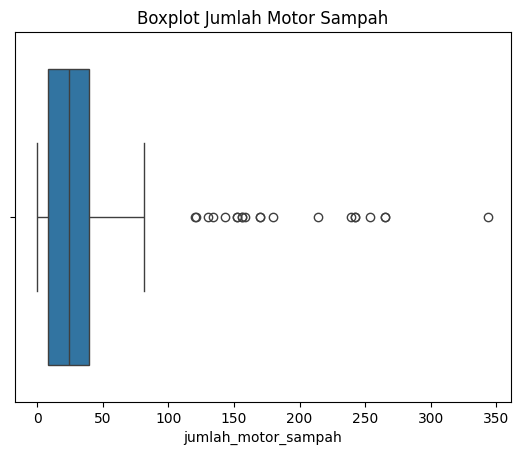

In [25]:
sns.boxplot(x=mtr['jumlah_motor_sampah'])
plt.title('Boxplot Jumlah Motor Sampah')
plt.show()

7. Memeriksa Inkonsistensi Data pada Dataset

In [11]:
mtr.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,7
KABUPATEN KARAWANG,7
KOTA TASIKMALAYA,7
KOTA CIMAHI,7
KOTA DEPOK,7
KOTA BEKASI,7
KOTA CIREBON,7
KOTA BANDUNG,7
KOTA SUKABUMI,7


### B. Mengeksplorasi Dataset Persentase Tingkat Pelayanan Sampah

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [12]:
prsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    189 non-null    int64  
 1   kode_provinsi         189 non-null    int64  
 2   nama_provinsi         189 non-null    object 
 3   kode_kabupaten_kota   189 non-null    int64  
 4   nama_kabupaten_kota   189 non-null    object 
 5   persentase_pelayanan  189 non-null    float64
 6   satuan                189 non-null    object 
 7   tahun                 189 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 11.9+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [13]:
prsn.describe()

,id,kode_provinsi,kode_kabupaten_kota,persentase_pelayanan,tahun
count,189.000000,189.0,189.000000,189.000000,189.000000
mean,95.000000,32.0,3231.333333,62.440529,2019.571429
std,54.703748,0.0,31.284725,24.868977,2.447628
min,1.000000,32.0,3201.000000,0.000000,2016.000000
25%,48.000000,32.0,3207.000000,49.570000,2017.000000
50%,95.000000,32.0,3214.000000,69.000000,2020.000000
75%,142.000000,32.0,3273.000000,78.500000,2022.000000
max,189.000000,32.0,3279.000000,145.910000,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [14]:
prsn.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pelayanan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,57.54,PERSEN,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,49.59,PERSEN,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,36.73,PERSEN,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,61.50,PERSEN,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,51.58,PERSEN,2016


4. Membuang atribut yang tidak diperlukan

In [15]:
prsn = prsn.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa Nilai NULL

In [16]:
prsn.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
persentase_pelayanan,0
tahun,0


6. Memeriksa Outlier pada Dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


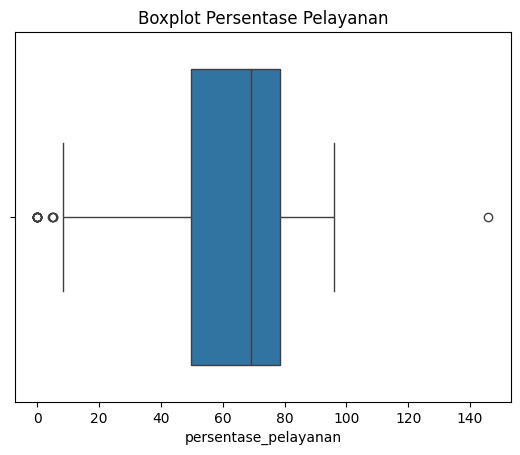

In [17]:
sns.boxplot(x=prsn['persentase_pelayanan'])
plt.title('Boxplot Persentase Pelayanan')
plt.show()

7. Memeriksa inkonsistensi data

In [19]:
prsn.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,7
KABUPATEN KARAWANG,7
KOTA TASIKMALAYA,7
KOTA CIMAHI,7
KOTA DEPOK,7
KOTA BEKASI,7
KOTA CIREBON,7
KOTA BANDUNG,7
KOTA SUKABUMI,7


### C. Mengeksplorasi dataset jumlah sampah yang ditangani

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [20]:
jml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   243 non-null    int64  
 1   kode_provinsi        243 non-null    int64  
 2   nama_provinsi        243 non-null    object 
 3   kode_kabupaten_kota  243 non-null    int64  
 4   nama_kabupaten_kota  243 non-null    object 
 5   jumlah_sampah        243 non-null    float64
 6   satuan               243 non-null    object 
 7   tahun                243 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.3+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [21]:
jml.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_sampah,tahun
count,243.000000,243.0,243.000000,2.430000e+02,243.000000
mean,122.000000,32.0,3231.333333,1.721056e+05,2019.000000
std,70.292247,0.0,31.266252,3.917507e+05,2.587318
min,1.000000,32.0,3201.000000,1.200000e+00,2015.000000
25%,61.500000,32.0,3207.000000,2.344100e+02,2017.000000
50%,122.000000,32.0,3214.000000,6.670600e+02,2019.000000
75%,182.500000,32.0,3273.000000,1.507118e+05,2021.000000
max,243.000000,32.0,3279.000000,2.075276e+06,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [22]:
jml.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_sampah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,861919.33,TON PER HARI,2015
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,205690.23,TON PER HARI,2015
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,355554.29,TON PER HARI,2015
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1156523.00,TON PER HARI,2015
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,237389.82,TON PER HARI,2015


4. Membuang atribut yang tidak diperlukan

In [23]:
jml = jml.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa nilai NULL

In [24]:
jml.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jumlah_sampah,0
tahun,0


6. Memeriksa Outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


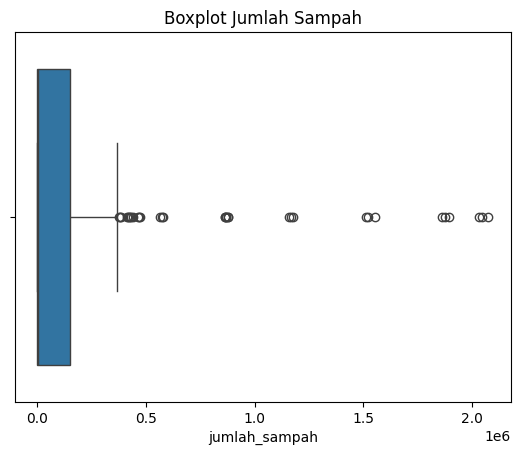

In [26]:
sns.boxplot(x=jml['jumlah_sampah'])
plt.title('Boxplot Jumlah Sampah')
plt.show()

7. Memeriksa inkonsistensi data

In [27]:
jml.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,9
KABUPATEN KARAWANG,9
KOTA TASIKMALAYA,9
KOTA CIMAHI,9
KOTA DEPOK,9
KOTA BEKASI,9
KOTA CIREBON,9
KOTA BANDUNG,9
KOTA SUKABUMI,9


###D. Mengeksplorasi dataset jumlah sampah masuk pengelolaan kompos

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [28]:
kps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   138 non-null    int64 
 1   kode_provinsi        138 non-null    int64 
 2   nama_provinsi        138 non-null    object
 3   kode_kabupaten_kota  138 non-null    int64 
 4   nama_kabupaten_kota  138 non-null    object
 5   kode_bulan           138 non-null    int64 
 6   nama_bulan           138 non-null    object
 7   jumlah_sampah        138 non-null    int64 
 8   satuan               138 non-null    object
 9   tahun                138 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 10.9+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [29]:
kps.describe()

,id,kode_provinsi,kode_kabupaten_kota,kode_bulan,jumlah_sampah,tahun
count,138.000000,138.0,138.000000,138.000000,1.380000e+02,138.000000
mean,69.500000,32.0,3244.434783,6.630435,7.582897e+06,2017.043478
std,39.981246,0.0,32.386569,3.462154,1.200305e+07,0.809339
min,1.000000,32.0,3204.000000,1.000000,2.402400e+04,2016.000000
25%,35.250000,32.0,3217.000000,4.000000,5.211382e+05,2016.000000
50%,69.500000,32.0,3273.000000,7.000000,3.817799e+06,2017.000000
75%,103.750000,32.0,3277.000000,10.000000,6.202223e+06,2018.000000
max,138.000000,32.0,3277.000000,12.000000,4.156045e+07,2018.000000


3. Menampilkan 5 baris pertama pada dataset

In [30]:
kps.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kode_bulan,nama_bulan,jumlah_sampah,satuan,tahun
0,1,32,JAWA BARAT,3204,KABUPATEN BANDUNG,7,JULI,280896,TON,2016
1,2,32,JAWA BARAT,3204,KABUPATEN BANDUNG,8,AGUSTUS,574868,TON,2016
2,3,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9,SEPTEMBER,332719,TON,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,10,OKTOBER,323843,TON,2016
4,5,32,JAWA BARAT,3204,KABUPATEN BANDUNG,11,NOVEMBER,386527,TON,2016


4. Membuang atribut yang tidak diperlukan

In [31]:
kps = kps.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa nilai NULL

In [32]:
kps.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
kode_bulan,0
nama_bulan,0
jumlah_sampah,0
tahun,0


6. Memeriksa outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


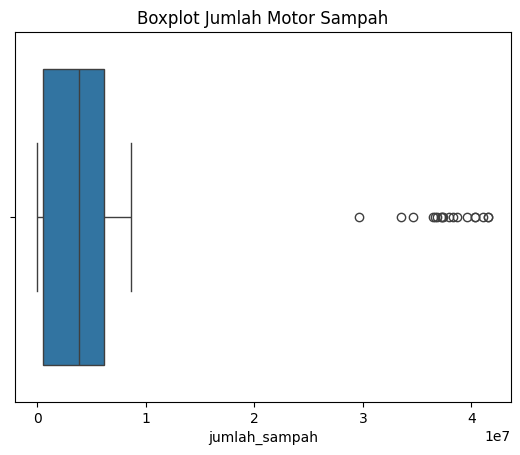

In [33]:
sns.boxplot(x=kps['jumlah_sampah'])
plt.title('Boxplot Jumlah Motor Sampah')
plt.show()

7. Memeriksa inkonsistensi data

In [34]:
kps.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BANDUNG BARAT,36
KOTA BANDUNG,36
KOTA CIMAHI,36
KABUPATEN BANDUNG,30


###E. Mengeksplorasi dataset jumlah dump truck untuk operasional pengelolaan sampah

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [35]:
dump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   189 non-null    int64 
 1   kode_provinsi        189 non-null    int64 
 2   nama_provinsi        189 non-null    object
 3   kode_kabupaten_kota  189 non-null    int64 
 4   nama_kabupaten_kota  189 non-null    object
 5   jumlah_dumptruck     189 non-null    int64 
 6   satuan               189 non-null    object
 7   tahun                189 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 11.9+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [36]:
dump.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_dumptruck,tahun
count,189.000000,189.0,189.000000,189.000000,189.000000
mean,95.000000,32.0,3231.333333,38.253968,2019.571429
std,54.703748,0.0,31.284725,45.711154,2.447628
min,1.000000,32.0,3201.000000,0.000000,2016.000000
25%,48.000000,32.0,3207.000000,9.000000,2017.000000
50%,95.000000,32.0,3214.000000,23.000000,2020.000000
75%,142.000000,32.0,3273.000000,36.000000,2022.000000
max,189.000000,32.0,3279.000000,198.000000,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [37]:
dump.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_dumptruck,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,136,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,23,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,25,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,59,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,14,UNIT,2016


4. Membuang atribut yang tidak diperlukan

In [38]:
dump = dump.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa nilai NULL

In [39]:
dump.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jumlah_dumptruck,0
tahun,0


6. Memeriksa outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


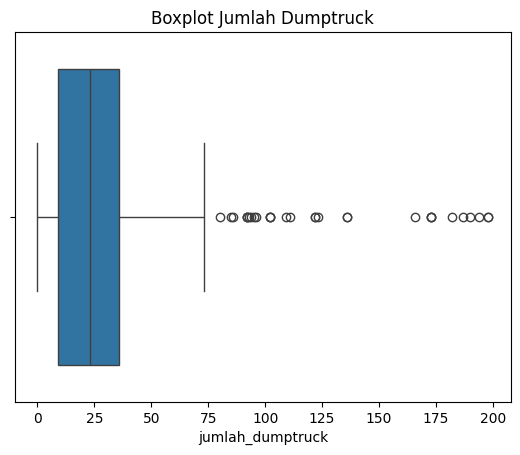

In [40]:
sns.boxplot(x=dump['jumlah_dumptruck'])
plt.title('Boxplot Jumlah Dumptruck')
plt.show()

7. Memeriksa inkonsistensi data pada dataset

In [41]:
dump.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,7
KABUPATEN KARAWANG,7
KOTA TASIKMALAYA,7
KOTA CIMAHI,7
KOTA DEPOK,7
KOTA BEKASI,7
KOTA CIREBON,7
KOTA BANDUNG,7
KOTA SUKABUMI,7


###F. Mengeksplorasi dataset jumlah mobil pickup untuk operasional pengelolaan sampah

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [42]:
pck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   189 non-null    int64 
 1   kode_provinsi        189 non-null    int64 
 2   nama_provinsi        189 non-null    object
 3   kode_kabupaten_kota  189 non-null    int64 
 4   nama_kabupaten_kota  189 non-null    object
 5   jumlah_mobil_pickup  189 non-null    int64 
 6   satuan               189 non-null    object
 7   tahun                189 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 11.9+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [43]:
pck.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_mobil_pickup,tahun
count,189.000000,189.0,189.000000,189.000000,189.000000
mean,95.000000,32.0,3231.333333,5.396825,2019.571429
std,54.703748,0.0,31.284725,7.638522,2.447628
min,1.000000,32.0,3201.000000,0.000000,2016.000000
25%,48.000000,32.0,3207.000000,0.000000,2017.000000
50%,95.000000,32.0,3214.000000,2.000000,2020.000000
75%,142.000000,32.0,3273.000000,7.000000,2022.000000
max,189.000000,32.0,3279.000000,38.000000,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [44]:
pck.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_mobil_pickup,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,1,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,2,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,5,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,0,UNIT,2016


4. Membuang atribut yang tidak diperlukan

In [45]:
pck = pck.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa nilai NULL

In [46]:
pck.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jumlah_mobil_pickup,0
tahun,0


6. Memeriksa outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


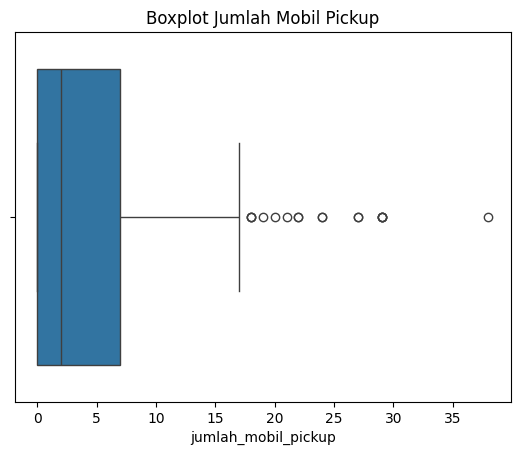

In [47]:
sns.boxplot(x=pck['jumlah_mobil_pickup'])
plt.title('Boxplot Jumlah Mobil Pickup')
plt.show()

7. Memeriksa inkonsistensi data pada dataset

In [48]:
pck.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,7
KABUPATEN KARAWANG,7
KOTA TASIKMALAYA,7
KOTA CIMAHI,7
KOTA DEPOK,7
KOTA BEKASI,7
KOTA CIREBON,7
KOTA BANDUNG,7
KOTA SUKABUMI,7


### G. Mengeksplorasi dataset jumlah truk sampah untuk operasional pengelolaan sampah

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [49]:
truk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   189 non-null    int64  
 1   kode_provinsi        189 non-null    int64  
 2   nama_provinsi        189 non-null    object 
 3   kode_kabupaten_kota  189 non-null    int64  
 4   nama_kabupaten_kota  189 non-null    object 
 5   jumlah_truck_sampah  187 non-null    float64
 6   satuan               189 non-null    object 
 7   tahun                189 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 11.9+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [50]:
truk.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_truck_sampah,tahun
count,189.000000,189.0,189.000000,187.000000,189.000000
mean,95.000000,32.0,3231.333333,2.743316,2019.571429
std,54.703748,0.0,31.284725,11.728487,2.447628
min,1.000000,32.0,3201.000000,0.000000,2016.000000
25%,48.000000,32.0,3207.000000,0.000000,2017.000000
50%,95.000000,32.0,3214.000000,0.000000,2020.000000
75%,142.000000,32.0,3273.000000,0.000000,2022.000000
max,189.000000,32.0,3279.000000,94.000000,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [51]:
truk.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_truck_sampah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,94.0,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0.0,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,15.0,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0.0,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,1.0,UNIT,2016


4. Membuang atribut yang tidak diperlukan

In [52]:
truk = truk.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa Nilai NULL

In [53]:
truk.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jumlah_truck_sampah,2
tahun,0


6. Memeriksa outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


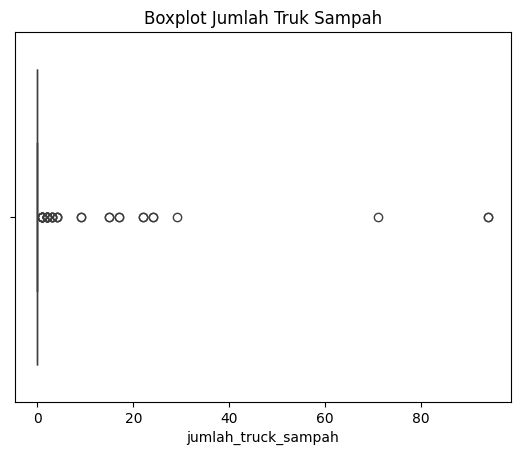

In [78]:
sns.boxplot(x=truk['jumlah_truck_sampah'])
plt.title('Boxplot Jumlah Truk Sampah')
plt.show()

7. Memeriksa Inkonsistensi Data pada Dataset

In [55]:
truk.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,7
KABUPATEN KARAWANG,7
KOTA TASIKMALAYA,7
KOTA CIMAHI,7
KOTA DEPOK,7
KOTA BEKASI,7
KOTA CIREBON,7
KOTA BANDUNG,7
KOTA SUKABUMI,7


### H. Mengeksplorasi dataset jumlah arm roll truk untuk operasional pengelolaan sampah

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [56]:
arm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   189 non-null    int64  
 1   kode_provinsi        189 non-null    int64  
 2   nama_provinsi        189 non-null    object 
 3   kode_kabupaten_kota  189 non-null    int64  
 4   nama_kabupaten_kota  189 non-null    object 
 5   jumlah_armroll       188 non-null    float64
 6   satuan               189 non-null    object 
 7   tahun                189 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 11.9+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [57]:
arm.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_armroll,tahun
count,189.000000,189.0,189.000000,188.000000,189.000000
mean,95.000000,32.0,3231.333333,16.925532,2019.571429
std,54.703748,0.0,31.284725,17.879118,2.447628
min,1.000000,32.0,3201.000000,0.000000,2016.000000
25%,48.000000,32.0,3207.000000,6.750000,2017.000000
50%,95.000000,32.0,3214.000000,10.000000,2020.000000
75%,142.000000,32.0,3273.000000,21.000000,2022.000000
max,189.000000,32.0,3279.000000,95.000000,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [58]:
arm.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_armroll,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9.0,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,7.0,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,4.0,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,22.0,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,4.0,UNIT,2016


4. Membuang atribut yang tidak diperlukan

In [59]:
arm = arm.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

5. Memeriksa Nilai NULL

In [60]:
arm.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jumlah_armroll,1
tahun,0


6. Memeriksa outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


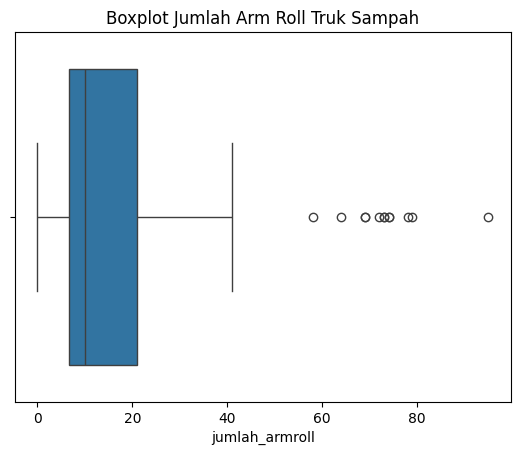

In [77]:
sns.boxplot(x=arm['jumlah_armroll'])
plt.title('Boxplot Jumlah Arm Roll Truk Sampah')
plt.show()

7. Memeriksa Inkonsistensi Data pada Dataset

In [63]:
arm.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,7
KABUPATEN KARAWANG,7
KOTA TASIKMALAYA,7
KOTA CIMAHI,7
KOTA DEPOK,7
KOTA BEKASI,7
KOTA CIREBON,7
KOTA BANDUNG,7
KOTA SUKABUMI,7


### I. Mengeksplorasi dataset jumlah desa berdasarkan tempat membuang sampah

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [62]:
desa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      74 non-null     int64 
 1   kode_provinsi           74 non-null     int64 
 2   nama_provinsi           74 non-null     object
 3   kode_kabupaten_kota     74 non-null     int64 
 4   nama_kabupaten_kota     74 non-null     object
 5   kategori_tempat_sampah  74 non-null     object
 6   jumlah_desa             74 non-null     int64 
 7   satuan                  74 non-null     object
 8   tahun                   74 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 5.3+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [64]:
desa.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_desa,tahun
count,74.000000,74.0,74.000000,74.000000,74.0
mean,36.500000,32.0,3211.378378,71.783784,2020.0
std,21.505813,0.0,12.462220,75.724495,0.0
min,0.000000,32.0,3201.000000,1.000000,2020.0
25%,18.250000,32.0,3205.000000,9.000000,2020.0
50%,36.500000,32.0,3210.000000,34.000000,2020.0
75%,54.750000,32.0,3214.000000,123.500000,2020.0
max,73.000000,32.0,3279.000000,255.000000,2020.0


3. Menampilkan 5 baris pertama pada dataset

In [65]:
desa.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_tempat_sampah,jumlah_desa,satuan,tahun
0,0,32,JAWA BARAT,3201,KABUPATEN BOGOR,DALAM LUBANG ATAU DIBAKAR,230,DESA,2020
1,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAINNYA,18,DESA,2020
2,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,SUNGAI/ SALURAN IRIGASI/ DANAU/ LAUT/ GOT/ SEL...,30,DESA,2020
3,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,TEMPAT SAMPAH KEMUDIAN DIANGKUT,138,DESA,2020
4,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,DALAM LUBANG ATAU DIBAKAR,230,DESA,2020



4. Membuang atribut yang tidak diperlukan

In [66]:
desa = desa.drop(columns=["kode_provinsi","nama_provinsi","satuan"])

5. Memeriksa Nilai NULL

In [67]:
desa.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
kategori_tempat_sampah,0
jumlah_desa,0
tahun,0


6. Memeriksa outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


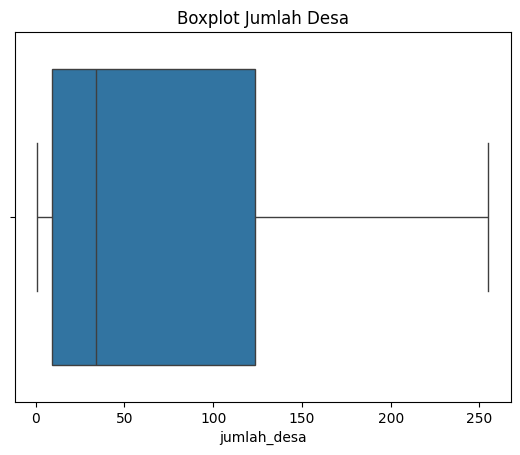

In [68]:
sns.boxplot(x=desa['jumlah_desa'])
plt.title('Boxplot Jumlah Desa')
plt.show()

7. Memeriksa inkonsistensi data pada dataset

In [69]:
desa.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BOGOR,4
KABUPATEN SUMEDANG,4
KABUPATEN PANGANDARAN,4
KABUPATEN BANDUNG BARAT,4
KABUPATEN BEKASI,4
KABUPATEN KARAWANG,4
KABUPATEN PURWAKARTA,4
KABUPATEN SUBANG,4
KABUPATEN INDRAMAYU,4


### J. Mengeksplorasi dataset jumlah ritasi sampah masuk ke tempat pembuangan akhir

1. Memeriksa atribut, jumlah non null, dan tipe data pada dataset

In [70]:
rts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    378 non-null    int64 
 1   kode_provinsi         378 non-null    int64 
 2   nama_provinsi         378 non-null    object
 3   kode_kabupaten_kota   378 non-null    int64 
 4   nama_kabupaten_kota   378 non-null    object
 5   kode_bulan            378 non-null    int64 
 6   nama_bulan            378 non-null    object
 7   jumlah_ritasi_sampah  378 non-null    int64 
 8   satuan                378 non-null    object
 9   tahun                 378 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 29.7+ KB


2. Menampilkan Statistik Deskriptif dari dataset

In [71]:
rts.describe()

,id,kode_provinsi,kode_kabupaten_kota,kode_bulan,jumlah_ritasi_sampah,tahun
count,378.000000,378.0,378.000000,378.000000,378.000000,378.000000
mean,189.500000,32.0,3243.365079,6.547619,2986.605820,2019.555556
std,109.263443,0.0,32.536925,3.456299,2571.651044,2.269235
min,1.000000,32.0,3204.000000,1.000000,568.000000,2016.000000
25%,95.250000,32.0,3217.000000,4.000000,1338.250000,2018.000000
50%,189.500000,32.0,3273.000000,7.000000,1674.500000,2020.000000
75%,283.750000,32.0,3277.000000,10.000000,4842.750000,2022.000000
max,378.000000,32.0,3277.000000,12.000000,8610.000000,2023.000000


3. Menampilkan 5 baris pertama pada dataset

In [72]:
rts.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kode_bulan,nama_bulan,jumlah_ritasi_sampah,satuan,tahun
0,1,32,JAWA BARAT,3204,KABUPATEN BANDUNG,7,JULI,568,RIT,2016
1,2,32,JAWA BARAT,3204,KABUPATEN BANDUNG,8,AGUSTUS,1334,RIT,2016
2,3,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9,SEPTEMBER,1220,RIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,10,OKTOBER,1272,RIT,2016
4,5,32,JAWA BARAT,3204,KABUPATEN BANDUNG,11,NOVEMBER,1216,RIT,2016


4. Membuang atribut yang tidak diperlukan

In [73]:
rts = rts.drop(columns=["kode_provinsi","nama_provinsi","satuan"])

5. Memeriksa Nilai NULL

In [74]:
rts.isnull().sum()

,0
id,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
kode_bulan,0
nama_bulan,0
jumlah_ritasi_sampah,0
tahun,0


6. Memeriksa outlier Data pada dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


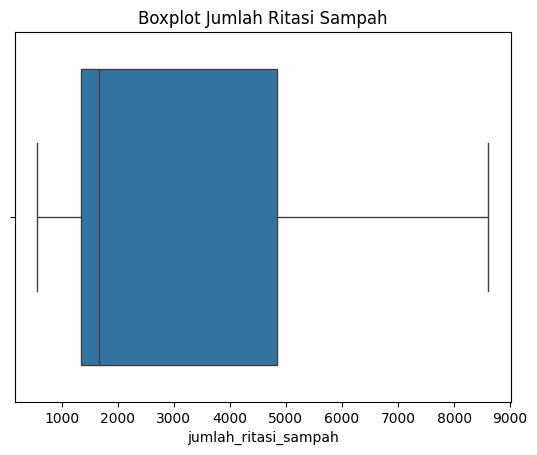

In [75]:
sns.boxplot(x=rts['jumlah_ritasi_sampah'])
plt.title('Boxplot Jumlah Ritasi Sampah')
plt.show()

7. Memeriksa inkonsistensi data pada dataset

In [76]:
rts.nama_kabupaten_kota.value_counts()

,count
nama_kabupaten_kota,
KABUPATEN BANDUNG BARAT,96
KOTA BANDUNG,96
KOTA CIMAHI,96
KABUPATEN BANDUNG,90


#Analisis dari Data Eksplorasi
### Drop Kolom pada Dataset
Kolom `kode_provinsi`, `nama_provinsi`, dan `satuan` dihapus karena analisis berfokus pada data kabupaten/kota. Selain itu, nama dataset sudah mencantumkan Jawa Barat, sehingga penggunaan kode dan nama provinsi tidak diperlukan lagi. Informasi satuan juga dapat diabaikan agar analisis lebih terarah pada data utama, seperti jumlah sampah dan kendaraan di tiap kabupaten/kota.
### Pengecekan Nilai Null pada Dataset
Hasil dari kode tersebut menunjukkan bahwa tidak ada nilai null di semua kolom DataFrame kecuali kolom arm roll, karena semua kolom menunjukkan angka 0. Tidak ada data yang hilang dalam DataFrame kecuali arm roll. Oleh karena itu, proses pembersihan data terkait nilai null tidak diperlukan, dan data ini siap digunakan untuk analisis lebih lanjut.
### Pengecekan Outliers
Dari pengecekan tersebut terlihat bahwa terdapat beberapa outliers, seperti contohnya persentase pelayanan, dimana ada 1 data yang melebihi 100%, yang tentunya perlu dilakukan penanganan outliers
### Pengecekan Inkonsistensi Data pada Dataset
Data pada kolom `nama_provinsi` dan `nama_kabupaten_kota` cukup konsisten dan tidak menunjukkan adanya
masalah inkonsistensi yang signifikan, sehingga analisis berdasarkan data ini menjadi lebih mudah dan dapat dipercaya.
